In [49]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import math

# Load data

In [82]:
t = pd.read_csv('data/m4_gaia.csv')
gc_data = pd.read_fwf('data/baumgardt_table.dat')
gc_data2 = pd.read_fwf('data/baumgardt_table2.dat')

t = t.drop(columns=['Unnamed: 0','Unnamed: 0.1'],axis=1)


# New features

In [71]:
cluster_mask = gc_data['Cluster'] == 'NGC_6121'

#define positions w.r.t. cluster centre
delta_ra = t.ra.values - gc_data.loc[cluster_mask]['RA'].to_numpy()
delta_dec = t.dec.values - gc_data.loc[cluster_mask]['DEC'].to_numpy()

#rhm in degrees
dist = gc_data.loc[cluster_mask]['R_Sun'].to_numpy()*1e3 #distance in pc
rhm = gc_data.loc[cluster_mask]['rhm'].to_numpy() #r_hm in pc
rhm_deg = math.degrees(math.atan(rhm/dist))

#normalised coordinates
t['ra_norm'] = delta_ra/rhm_deg
t['dec_norm'] = delta_dec/rhm_deg 

# Member selection

In [72]:
pmra = -12.513
pmdec = -19.009
parallax = 0.53543

# select stars in circle
def in_circle(center_x, center_y, radius, x, y):
    square_dist = (center_x - x) ** 2 + (center_y - y) ** 2
    return square_dist <= (radius) ** 2

# select stars within 1.5mas of t's PM
pm_mask = in_circle(pmra,pmdec,1.5,t['pmra'],t['pmdec'])

#select stars within 0.58 of M4's parallax
parallax_mask = (parallax-0.58254<=t['parallax']) & (t['parallax']<=parallax+0.58254)

members_mask = pm_mask & parallax_mask

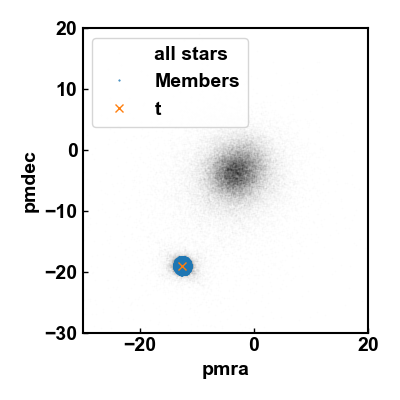

In [73]:
plt.figure(figsize=(4,4))
plt.plot(t['pmra'],t['pmdec'],'.',color='k',alpha=0.01,ms=1,label='all stars')
plt.plot(t['pmra'][members_mask],t['pmdec'][members_mask],'.',alpha=1,ms=1,label='Members')
# plt.plot(pmra,pmdec,'x',label='')
plt.legend()
plt.ylim(-30,20)
plt.xlim(-30,20)
plt.ylabel('pmdec')
plt.xlabel('pmra')
plt.tight_layout()


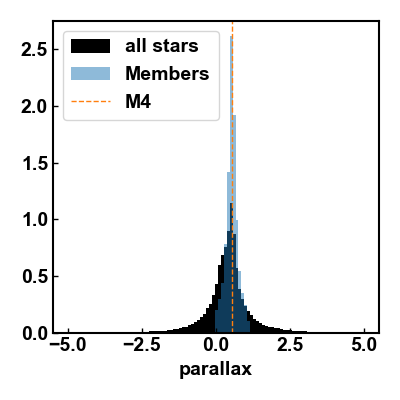

In [7]:
bins=np.linspace(-5,5,100)

plt.figure(figsize=(4,4))
plt.hist(t['parallax'],label='all stars',density=True,bins=bins,color='k')
plt.hist(t['parallax'][members_mask],label='Members',density=True,bins=bins,alpha=0.5)
plt.axvline(parallax,ls='--',lw=1,label='M4',color='tab:orange')
plt.legend()
plt.xlabel('parallax')
plt.tight_layout()

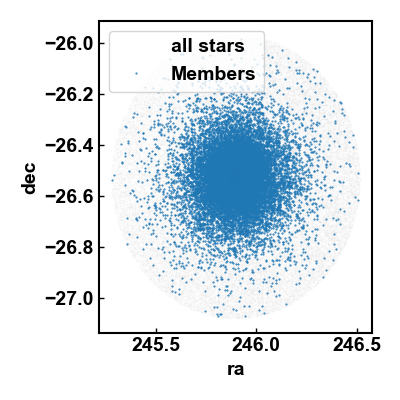

In [8]:
plt.figure(figsize=(4,4))
plt.plot(t['ra'],t['dec'],'.',color='k',alpha=0.01,ms=1,label='all stars')
plt.plot(t['ra'][members_mask],t['dec'][members_mask],'.',alpha=1,ms=1,label='Members')
plt.legend()
plt.ylabel('dec')
plt.xlabel('ra')
plt.tight_layout()


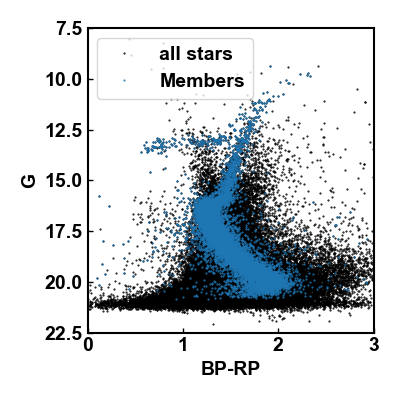

In [9]:
plt.figure(figsize=(4,4))
plt.plot(t['bp_rp'],t['phot_g_mean_mag'],'.',color='k',alpha=1,ms=1,label='all stars')
plt.plot(t['bp_rp'][members_mask],t['phot_g_mean_mag'][members_mask],'.',alpha=1,ms=1,label='Members')
plt.legend()
plt.ylim(22.5,7.5)
plt.xlim(0,3)
plt.ylabel('G')
plt.xlabel('BP-RP')
plt.tight_layout()

In [10]:
t['member'] = members_mask

In [11]:
t.to_csv('data/t_gaia.csv')

In [12]:
plt.close('all')

In [10]:
gc_data

,Cluster,RA,DEC,R_Sun,DR,R_GC,DR_GC,N_RV,N_PM,Mass,...,M_High,MF,DMF,sig0,vesc,etac,etah,ARot,DARot,P_Rot
0,NGC_104,6.02379,-72.08131,4.52,0.03,7.52,0.01,7177,27460,853000.0,...,0.86,-0.65,0.12,11.9,47.4,-0.40,-0.04,5.00,0.32,100.0
1,NGC_288,13.18850,-26.58261,8.99,0.09,12.21,0.06,549,2637,96200.0,...,0.82,-0.66,0.11,3.1,10.9,-0.31,-0.10,0.42,0.32,84.3
2,NGC_362,15.80942,-70.84878,8.83,0.10,9.62,0.06,2342,4286,252000.0,...,0.82,-0.76,0.13,8.6,34.0,-0.38,-0.11,0.51,0.56,53.0
3,Whiting_1,30.73750,-3.25278,30.59,1.17,35.15,1.11,3,0,1370.0,...,0.99,-1.16,0.60,0.3,1.1,-0.16,-0.03,NaN,NaN,NaN
4,NGC_1261,48.06754,-55.21622,16.40,0.19,18.28,0.17,345,3179,172000.0,...,0.83,-0.61,0.13,5.7,21.4,-0.34,-0.11,0.90,0.64,86.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,NGC_7089,323.36258,-0.82325,11.69,0.11,10.54,0.08,3931,5331,624000.0,...,0.78,-0.87,0.16,11.1,43.6,-0.37,-0.08,3.01,0.70,100.0
163,NGC_7099,325.09213,-23.17986,8.46,0.09,7.36,0.04,2902,2021,121000.0,...,0.77,-0.75,0.13,5.9,21.0,-0.39,-0.08,1.10,0.40,100.0
164,Pal_12,326.66180,-21.25261,18.49,0.30,15.28,0.26,24,0,6190.0,...,0.84,-0.61,0.15,0.7,2.5,-0.22,-0.11,NaN,NaN,NaN
165,Pal_13,346.68519,12.77154,23.48,0.40,24.57,0.36,20,0,2780.0,...,0.78,0.29,0.22,0.5,1.8,-0.33,-0.05,NaN,NaN,NaN


In [67]:
t = t.drop(columns=['Unnamed: 0','Unnamed: 0.1'],axis=1)

,source_id,designation,ra,dec,l,b,ecl_lon,ecl_lat,parallax,pmra,...,bp_rp,g_rp,phot_bp_mean_flux,phot_g_mean_flux,phot_rp_mean_flux,radial_velocity,ref_epoch,member,ra_norm,dec_norm
0,6045400806845106432,Gaia DR3 6045400806845106432,245.833047,-27.019046,350.554262,15.681778,248.511293,-5.364736,0.606498,-0.750180,...,1.346094,0.754024,186.135849,442.779526,373.257723,NaN,2016.0,False,-0.520645,-4.032367
1,6045397920613927936,Gaia DR3 6045397920613927936,245.866516,-27.018696,350.575423,15.660007,248.540779,-5.359517,NaN,NaN,...,1.893805,1.043335,25.857895,78.038758,85.872860,NaN,2016.0,False,-0.247061,-4.029504
2,6045397920613926912,Gaia DR3 6045397920613926912,245.869737,-27.019048,350.577163,15.657651,248.543680,-5.359395,-1.947497,-2.283624,...,1.271973,0.713350,41.419999,95.540880,77.578279,NaN,2016.0,False,-0.220735,-4.032382
3,6045397881962869376,Gaia DR3 6045397881962869376,245.845712,-27.015183,350.565130,15.676058,248.521837,-5.359080,-0.771852,2.799075,...,1.358597,0.753223,117.614885,283.231453,238.584534,NaN,2016.0,False,-0.417124,-4.000791
4,6045397748833121920,Gaia DR3 6045397748833121920,245.893520,-27.018327,350.592554,15.642494,248.564556,-5.355226,NaN,NaN,...,1.376984,1.185877,56.001339,92.081215,115.540296,NaN,2016.0,False,-0.026325,-4.026492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99845,6045465334425134720,Gaia DR3 6045465334425134720,245.971292,-26.518082,351.025488,15.927986,248.551543,-4.850351,0.722253,-13.173369,...,NaN,NaN,NaN,649.173342,NaN,NaN,2016.0,True,0.609411,0.062683
99846,6045465330130943232,Gaia DR3 6045465330130943232,245.974424,-26.519381,351.026447,15.925038,248.554530,-4.851177,0.709144,-12.751872,...,1.323227,0.762178,577.388272,1334.803364,1133.704686,NaN,2016.0,True,0.635014,0.052060
99847,6045466296499979264,Gaia DR3 6045466296499979264,245.909437,-26.509198,350.993608,15.974922,248.495284,-4.850593,NaN,NaN,...,NaN,NaN,NaN,161.050639,NaN,NaN,2016.0,False,0.103791,0.135305
99848,6045466124701722624,Gaia DR3 6045466124701722624,245.887882,-26.509207,350.980100,15.989184,248.476186,-4.853746,NaN,NaN,...,NaN,NaN,NaN,118.659126,NaN,NaN,2016.0,False,-0.072409,0.135230
